Copyright IBM Corp. 2023

This will generate Figure 2 and Figure 5 in Osogami et al. (2022).

> Takayuki Osogami, Segev Wasserkrug, Elisheva S. Shamash, "Mechanism Learning for Trading Networks", arXiv:2208.09222, 2022

Set `reduce_variables = False` to generate Figure 2 and `reduce_variables = True` to generate Figure 5.

In [1]:
reduce_variables = False

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pathlib

CB = True

path_name = "../exp/log/random_groves_learn"
fig_path_name = "../exp/fig/random_groves_learn"

if reduce_variables:
    path_name += "_reduced"
    fig_path_name += "_reduced"
if CB:
    path_name += "_CB"
    fig_path_name += "_CB"

instance = "10000_1024_1"
path = pathlib.Path(path_name)
path = path.joinpath(instance + ".csv")

fig_path_name += "_" + instance
fig_path = pathlib.Path(fig_path_name)
fig_path.mkdir(exist_ok=True, parents=True)

df = pd.read_csv(path)

# total absolute payment to/from IP
df["learn_payment"] = df["learn_payment_S-H"].abs() + df["learn_payment_S-L"].abs() + df["learn_payment_B-H"].abs() + df["learn_payment_B-L"].abs()

len(df)

1642

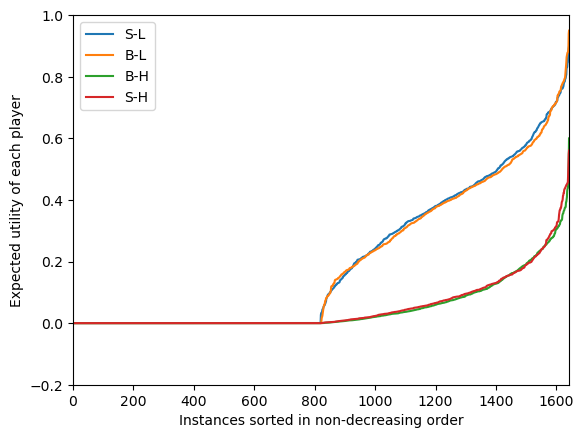

In [3]:
eps = 1e-9
# for method in ["comp", "learn"]:
for method in ["comp"]:
    plt.figure()
    if "learn" in method:
        metric = "learn"
    else:
        metric = "comp"
    metric += "_utility"
    for player in [player for player in df.columns if metric in player]:
        if "IP" in player:
            continue
        if "stable" in method:
            th = int(method.split("_")[-1])
            x = df[df["learn_payment"]<th][player]
        else:
            x = df[player]
        y = x.to_numpy()
        z = np.linspace(len(df) - len(y), len(df), len(y))
        plt.plot(z, sorted(y), label=player.strip(metric))
    plt.xlim([0, len(df)])
    plt.ylim([-0.2, 1])
    plt.legend()
    plt.xlabel("Instances sorted in non-decreasing order")
    plt.ylabel("Expected utility of each player")
    filename = method + "_utility"
    filename += ".pdf"
    plt.savefig(fig_path.joinpath(filename), bbox_inches='tight')

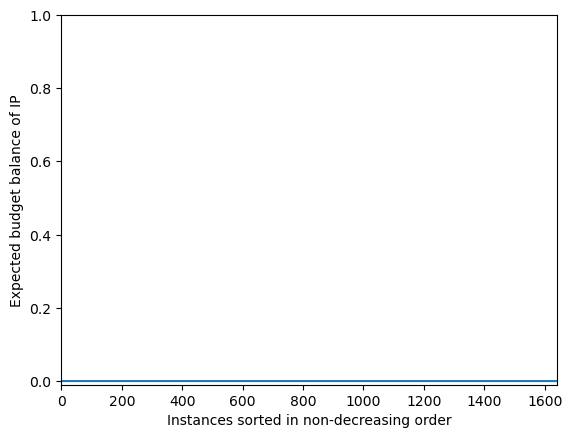

In [4]:
# for method in ["comp", "learn"]:
for method in ["comp"]:
    plt.figure()
    if "learn" in method:
        metric = "learn"
    else:
        metric = "comp"
    metric += "_utility_IP"
    if "stable" in method:
        th = int(method.split("_")[-1])
        x = df[df["learn_payment"]<th][metric]
    else:
        x = df[metric]
    y = x.abs().to_numpy()
    z = np.linspace(len(df) - len(y), len(df), len(y))
    plt.plot(z, sorted(y), label=player.strip(metric))
    plt.xlim([0, len(df)])
    plt.ylim([-0.01, 1])
    plt.xlabel("Instances sorted in non-decreasing order")
    plt.ylabel("Expected budget balance of IP")
    filename = method + "_budget_balance"
    filename += ".pdf"
    plt.savefig(fig_path.joinpath(filename), bbox_inches='tight')

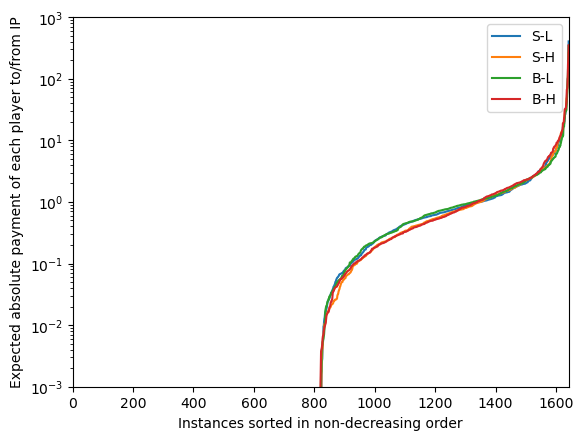

In [5]:
for method in ["comp"]:
#for method in ["comp", "learn"]:
    plt.figure()
    if "learn" in method:
        metric = "learn"
    else:
        metric = "comp"
    metric += "_payment"
    for player in [player for player in df.columns if metric in player]:
        if "IP" in player:
            continue
        if player == "learn_payment":
            continue
        if "stable" in method:
            th = int(method.split("_")[-1])
            x = df[df["learn_payment"]<th][player]
        else:
            x = df[player]
        y = np.maximum(x.abs().to_numpy(), 1e-9)
        z = np.linspace(len(df) - len(y), len(df), len(y))
        plt.semilogy(z, sorted(y), label=player.strip(metric))
    plt.xlim([0, len(df)])
    plt.ylim([1e-3, 1e+3])
    plt.legend()
    plt.xlabel("Instances sorted in non-decreasing order")
    plt.ylabel("Expected absolute payment of each player to/from IP")
    filename = method + "_payment"
    filename += ".pdf"
    plt.savefig(fig_path.joinpath(filename), bbox_inches='tight')